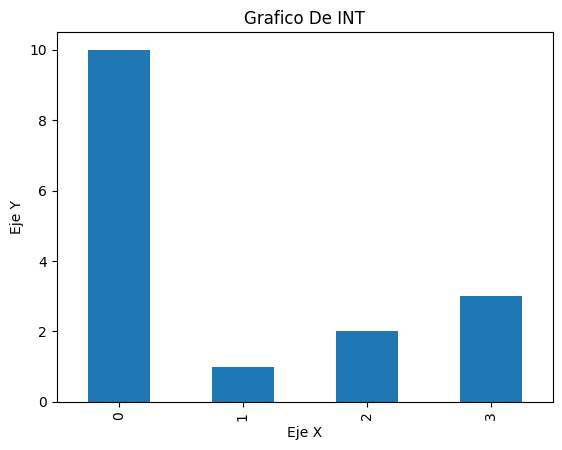

In [57]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

class Almacen():
    def __init__(self):
        self.almacen = {}
        
    def agregarDatosDic(self, param):
        if isinstance(param, (str, int, bool, datetime)):
            if type(param).__name__ in self.almacen:
                self.almacen[type(param).__name__].append(param)
            else:
                self.almacen[type(param).__name__] = [param]
        elif isinstance(param, dict):
            for valor in param.values():  
                if isinstance(valor, (list, tuple, dict, set)):
                    for posicion in valor:
                        if type(posicion).__name__ in self.almacen:
                            self.almacen[type(posicion).__name__].append(posicion)
                        else:
                            self.almacen[type(posicion).__name__] = [posicion]
                else:   
                    if type(valor).__name__ in self.almacen:
                        self.almacen[type(valor).__name__].append(valor)
                    else:
                        self.almacen[type(valor).__name__] = [valor] 
        else:
            for valor in param:
                if type(valor).__name__ in self.almacen:
                    self.almacen[type(valor).__name__].append(valor)
                else:
                    self.almacen[type(valor).__name__] = [valor]    
    
    def crearDataFrame(self):
        valorMax = 0
        for valor in self.almacen.values():
            if len(valor) > valorMax:
                valorMax = len(valor)
        for clave, valor in self.almacen.items():
            if len(valor) != valorMax:
                while len(valor) != valorMax:
                    self.almacen[clave].append(np.nan)
        DataFrame = pd.DataFrame(self.almacen)
        indice = pd.Series(range(len(DataFrame)), name='ID')
        DataFrame = DataFrame.set_index(indice)        
        self.almacen = {}
        self.almacen = DataFrame
        return self.almacen
    
    def filtrarDataFrame(self, fila=None, columna=None, mantenerCambios=False):
        if fila is None:
            fila = (0, len(self.almacen))
        if columna is None:
            columna = self.almacen.keys()
        if isinstance(fila, tuple) and len(fila) == 2:
            if isinstance(fila[0], int) and isinstance(fila[1], int):
                if not mantenerCambios:
                    return self.almacen.loc[fila[0]:fila[1], columna]
                else:
                    DataFrame = self.almacen.loc[fila[0]:fila[1], columna]
                    self.almacen = DataFrame
                    return self.almacen
            else:
                print("Ha habido un error con la fila")
        elif isinstance(fila, int):
            if not mantenerCambios:
                return self.almacen.loc[fila, columna]
            else:
                DataFrame = self.almacen.loc[fila, columna]
                self.almacen = DataFrame
                return self.almacen
        else:
            print("Ha habido un error con la fila")
    def pedirGrafica(self, tipoGrafica, columnas, titulo):
        x = "Eje X"
        y = "Eje Y"
        if columnas is None:
            df = self.almacen
        else:
            df = self.almacen[columnas]
        if columnas is str:
            df["str"] = pd.to_numeric(df["str"], downcast="float")
        if columnas is bool:
            df["bool"] = pd.to_numeric(df["bool"], downcast="float")
        if columnas is datetime:
            df["datetime"] = pd.to_numeric(df["datetime"], downcast="float")
        if tipoGrafica == "bar":
            df.plot.bar(xlabel = x, ylabel = y, title=titulo)
        elif tipoGrafica == 'barh':
            df.plot.barh(xlabel = x, ylabel = y, title=titulo)
        elif tipoGrafica == "line":
            df.plot.line(xlabel = x, ylabel = y, title=titulo)
        elif tipoGrafica == "pie":
            df.plot.pie(y=df.columns[0], labels=df.index, autopct="%1.1f%%", title=titulo)
        elif tipoGrafica == "hist":
            df.plot.hist(xlabel = x, ylabel = y, title=titulo)
        elif tipoGrafica == "area":
            df.plot.area(xlabel = x, ylabel = y, title=titulo)
        else:
            print("Ese tipo de gráfica no es valido")
        plt.show()


a = Almacen()
a.agregarDatosDic(10)
a.agregarDatosDic({"int": [1,2,3], "str": "5", "hola":[False, True], "adios": datetime.now()})
a.crearDataFrame()
a.pedirGrafica("bar", "int", "Grafico De INT")